In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define a range fo months as 1 through 12
months = np.arange(1, 13)
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [12]:
temp_seasonal_wave = np.sin((months - 1) / 12 * 2 * np.pi) * 15 + 12

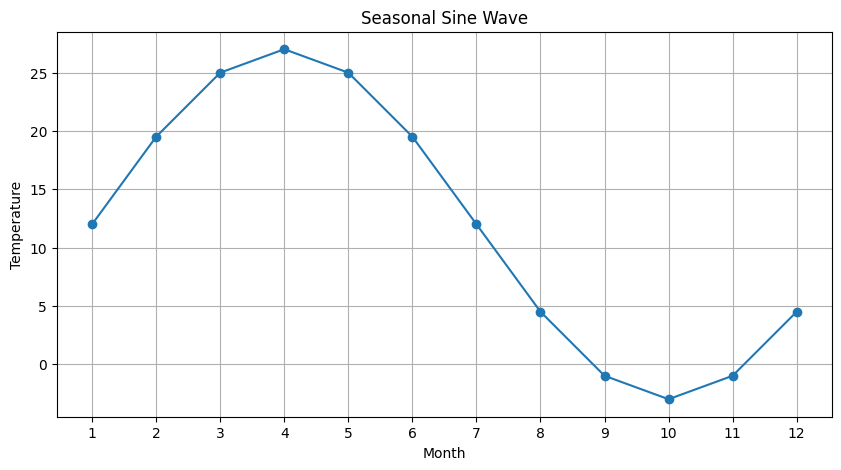

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(months, temp_seasonal_wave, marker='o')
plt.title('Seasonal Sine Wave')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(months)
plt.grid(True)
plt.show()

In [25]:
temp_seasonal_wave = np.sin(((months - 1) / 12 * 2 * np.pi) - (6 * (2 * np.pi) / 12 - (np.pi / 2))) * 17 +14

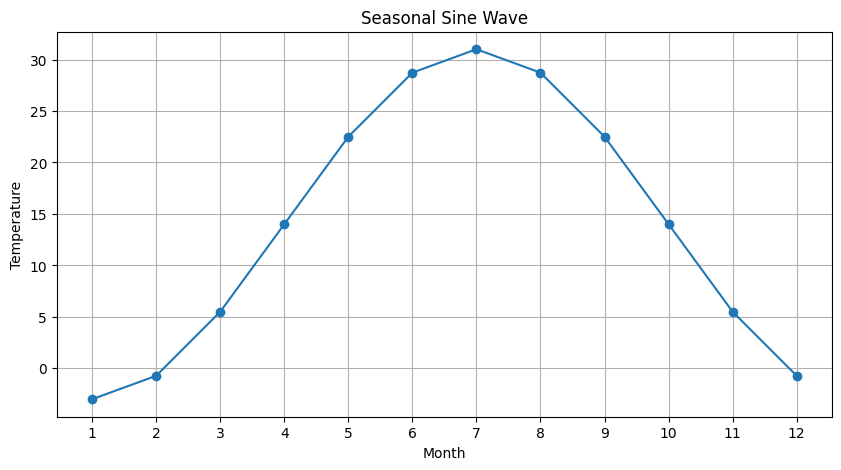

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(months, temp_seasonal_wave, marker='o')
plt.title('Seasonal Sine Wave')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(months)
plt.grid(True)
plt.show()

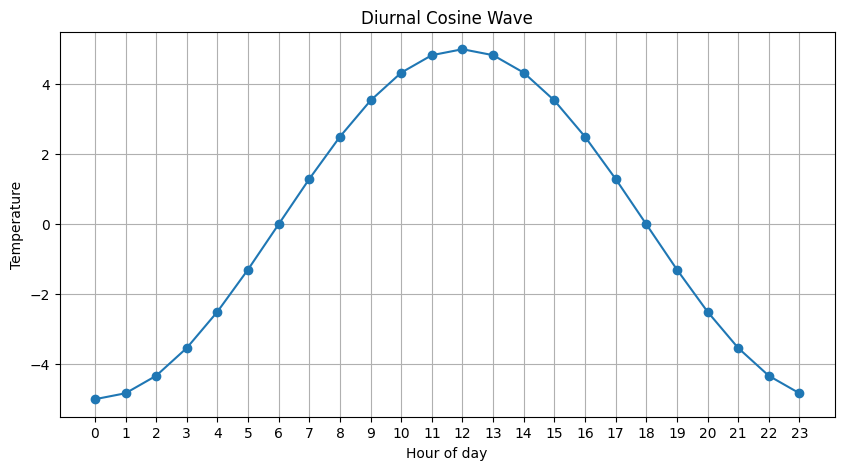

In [28]:
hours = np.arange(0, 24)
temp_diurnal_wave = np.cos((hours - 12) / 24 * 2 * np.pi) * 5

plt.figure(figsize=(10, 5))
plt.plot(hours, temp_diurnal_wave, marker='o')
plt.title('Diurnal Cosine Wave')
plt.xlabel('Hour of day')
plt.ylabel('Temperature')
plt.xticks(hours)
plt.grid(True)
plt.show()

In [31]:
start_date = '2018-01-01'
end_date = '2019-01-01'
date_times = pd.date_range(start=start_date, end=end_date, freq='H')

In [32]:
date_times

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-12-31 15:00:00', '2018-12-31 16:00:00',
               '2018-12-31 17:00:00', '2018-12-31 18:00:00',
               '2018-12-31 19:00:00', '2018-12-31 20:00:00',
               '2018-12-31 21:00:00', '2018-12-31 22:00:00',
               '2018-12-31 23:00:00', '2019-01-01 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')

In [37]:
months = date_times.month
hours = date_times.hour

In [40]:
months

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
      dtype='int32', length=8761)

In [48]:
temp_seasonal = pd.Series((np.sin(((months - 1) / 12 * 2 * np.pi) - (6 * (2 * np.pi) / 12 - (np.pi / 2))) * 17 +14), index=date_times)

In [42]:
def plot(date_times, temp):

    plt.figure(figsize=(15, 5))
    plt.plot(date_times, temp, label='Temperature')
    plt.title('Synthethic Temperature Data for One Year')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.grid(True)
    plt.legend()
    plt.show()

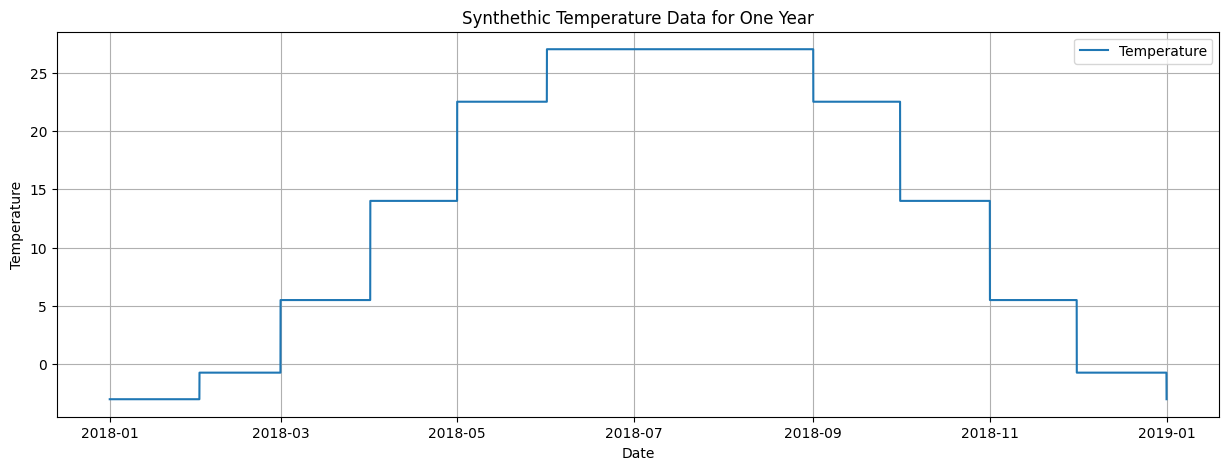

In [50]:
plot(date_times, temp_seasonal)

In [49]:
temp_seasonal = temp_seasonal.clip(lower=-20, upper=27)

In [51]:
temp_seasonal

2018-01-01 00:00:00   -3.000000
2018-01-01 01:00:00   -3.000000
2018-01-01 02:00:00   -3.000000
2018-01-01 03:00:00   -3.000000
2018-01-01 04:00:00   -3.000000
                         ...   
2018-12-31 20:00:00   -0.722432
2018-12-31 21:00:00   -0.722432
2018-12-31 22:00:00   -0.722432
2018-12-31 23:00:00   -0.722432
2019-01-01 00:00:00   -3.000000
Freq: H, Length: 8761, dtype: float64

In [52]:
temp_noise = np.random.normal(0, 2, len(date_times))

In [53]:
temp_noise

array([-1.79243473, -0.30359021,  1.64390667, ...,  1.55400335,
       -0.86839296, -2.55659804])

In [54]:
temp_diurnal = np.cos((hours - 12) / 24 * 2 * np.pi) * 5

In [55]:
temp = temp_seasonal + temp_diurnal + temp_noise

In [56]:
temp

2018-01-01 00:00:00    -9.792435
2018-01-01 01:00:00    -8.133219
2018-01-01 02:00:00    -5.686220
2018-01-01 03:00:00    -5.017519
2018-01-01 04:00:00    -4.213033
                         ...    
2018-12-31 20:00:00    -2.090487
2018-12-31 21:00:00    -3.753404
2018-12-31 22:00:00    -3.498556
2018-12-31 23:00:00    -6.420454
2019-01-01 00:00:00   -10.556598
Freq: H, Length: 8761, dtype: float64

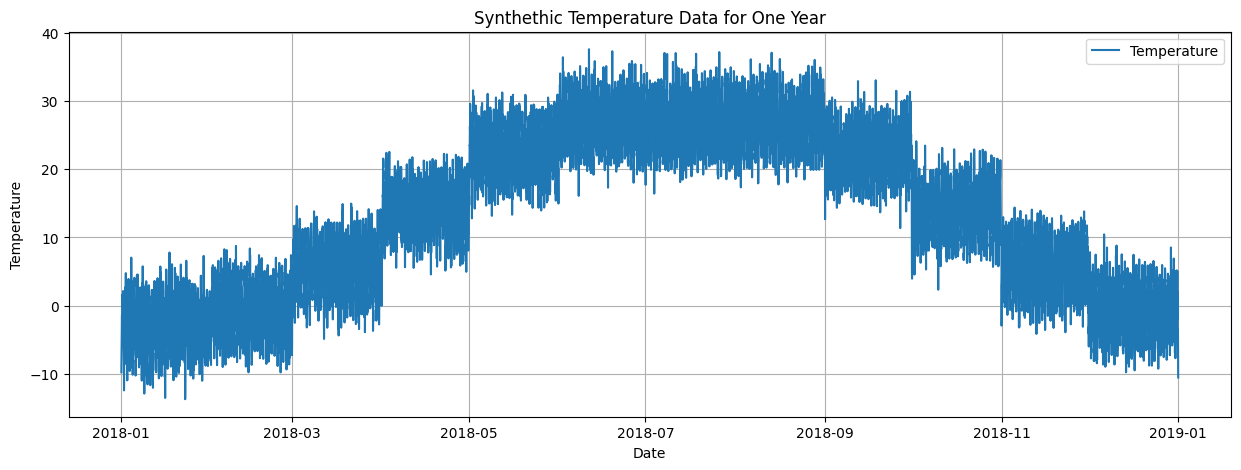

In [57]:
plot(date_times, temp)